<a href="https://colab.research.google.com/github/Thicabien2004/Plant-project/blob/main/PhyloAnova_(sum_of_months_vs_WA)_69t_vs_87t_with_predicted_flowering_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Add this at the top of your notebook
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%R
install.packages("phytools")
install.packages("caper")
install.packages("geiger")
install.packages("ape")
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘iterators’, ‘fastmatch’, ‘igraph’, ‘quadprog’, ‘ape’, ‘maps’, ‘clusterGeneration’, ‘coda’, ‘combinat’, ‘DEoptim’, ‘doParallel’, ‘expm’, ‘foreach’, ‘mnormt’, ‘numDeriv’, ‘optimParallel’, ‘phangorn’, ‘scatterplot3d’

trying URL 'https://cran.rstudio.com/src/contrib/iterators_1.0.14.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/fastmatch_1.1-6.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/igraph_2.1.4.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/quadprog_1.5-8.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/ape_5.8-1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/maps_3.4.3.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/clusterGeneration_1.3.8.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/coda_0.19-4.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/combinat_0.0-8.tar.gz'
trying URL 'https://c

In [ ]:
%%R
library(phytools)
library(caper)
library(geiger)
library(ape)
library(readxl)


In [ ]:
%%R
tree <-read.tree("/content/drive/MyDrive/PLANT RESEARCH/datasets/Copy of Rham.69t.WAonly.tree")
print(list(tree$tip.label))
print(tree)


[[1]]
 [1] "Trymalium_angustifolium"    "Trymalium_urceolare"       
 [3] "Trymalium_ledifolium"       "Trymalium_monospermum"     
 [5] "Trymalium_litorale"         "Trymalium_daphnifolium"    
 [7] "Trymalium_myrtillus"        "Trymalium_elachophyllum"   
 [9] "Polianthion_wichurae"       "Polianthion_biloculare"    
[11] "Polianthion_collinum"       "Stenanthemum_notiale"      
[13] "Stenanthemum_intricatum"    "Stenanthemum_nanum"        
[15] "Stenanthemum_coronatum"     "Stenanthemum_limitatum"    
[17] "Stenanthemum_emarginatum"   "Stenanthemum_tridentatum"  
[19] "Stenanthemum_reissekii"     "Stenanthemum_complicatum"  
[21] "Stenanthemum_pumilum"       "Stenanthemum_humile"       
[23] "Stenanthemum_sublineare"    "Stenanthemum_mediale"      
[25] "Stenanthemum_petraeum"      "Stenanthemum_pomaderroides"
[27] "Stenanthemum_stipulosum"    "Stenanthemum_newbeyi"      
[29] "Cryptandra_pungens"         "Cryptandra_inconspicua"    
[31] "Cryptandra_mutila"          "Cryptandra_gla

In [ ]:
%%R
tip_label_list <- as.list(tree$tip.label)
print(tip_label_list)

[[1]]
[1] "Trymalium_angustifolium"

[[2]]
[1] "Trymalium_urceolare"

[[3]]
[1] "Trymalium_ledifolium"

[[4]]
[1] "Trymalium_monospermum"

[[5]]
[1] "Trymalium_litorale"

[[6]]
[1] "Trymalium_daphnifolium"

[[7]]
[1] "Trymalium_myrtillus"

[[8]]
[1] "Trymalium_elachophyllum"

[[9]]
[1] "Polianthion_wichurae"

[[10]]
[1] "Polianthion_biloculare"

[[11]]
[1] "Polianthion_collinum"

[[12]]
[1] "Stenanthemum_notiale"

[[13]]
[1] "Stenanthemum_intricatum"

[[14]]
[1] "Stenanthemum_nanum"

[[15]]
[1] "Stenanthemum_coronatum"

[[16]]
[1] "Stenanthemum_limitatum"

[[17]]
[1] "Stenanthemum_emarginatum"

[[18]]
[1] "Stenanthemum_tridentatum"

[[19]]
[1] "Stenanthemum_reissekii"

[[20]]
[1] "Stenanthemum_complicatum"

[[21]]
[1] "Stenanthemum_pumilum"

[[22]]
[1] "Stenanthemum_humile"

[[23]]
[1] "Stenanthemum_sublineare"

[[24]]
[1] "Stenanthemum_mediale"

[[25]]
[1] "Stenanthemum_petraeum"

[[26]]
[1] "Stenanthemum_pomaderroides"

[[27]]
[1] "Stenanthemum_stipulosum"

[[28]]
[1] "Stenanthemum_n

In [ ]:
%%R
dd <- read.csv("/content/drive/MyDrive/PLANT RESEARCH/datasets/Copy of Rham-69t.subset.csv")
colnames(dd)

 [1] "species"             "X."                  "X.."                
 [4] "WA"                  "Age"                 "Ploidy"             
 [7] "log.length"          "log.area"            "log.turn"           
[10] "log.netd"            "log.spec"            "ORDER"              
[13] "species.1"           "Rare..Yes.No."       "EPBC"               
[16] "WA.1"                "January"             "February"           
[19] "March"               "April"               "May"                
[22] "June"                "July"                "August"             
[25] "September"           "October"             "November"           
[28] "December"            "genus"               "Sum.of.Months"      
[31] "bio15"               "bio12"               "bio7"               
[34] "bio4"                "AGE..Ma."            "ploidy"             
[37] "Length..km."         "Area..km2."          "speciation"         
[40] "Cluster"             "Category_Sum_Months"


In [ ]:
%%R
# which are mismatched?
tree_not_dd <- tree$tip.label[which(!tree$tip.label %in% dd$species)]
dd_not_tree <- dd$species[which(!dd$species %in% tree$tip.label)]

# drop mismatched
dd <- dd[which(!dd$species %in% dd_not_tree ),]
tree <- drop.tip(tree, tree_not_dd)

In [ ]:
%%R
# double check they match
all(dd$species %in% tree$tip.label)


[1] TRUE


In [ ]:
%%R
all(tree$tip.label %in% dd$species)

[1] TRUE


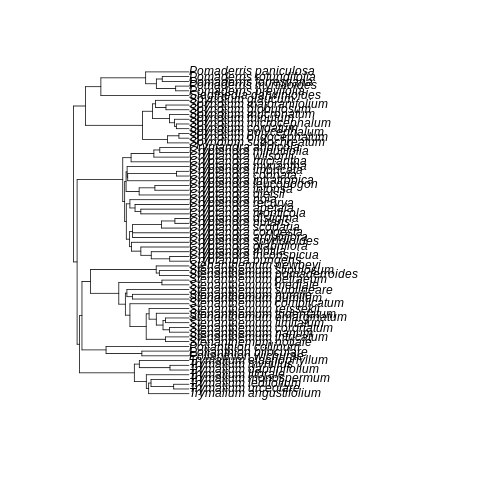

In [ ]:
%%R
plot(tree)

In [ ]:
%%R
Ntip(tree)

[1] 69


In [ ]:
%%R
colnames(dd)

 [1] "species"             "X."                  "X.."                
 [4] "WA"                  "Age"                 "Ploidy"             
 [7] "log.length"          "log.area"            "log.turn"           
[10] "log.netd"            "log.spec"            "ORDER"              
[13] "species.1"           "Rare..Yes.No."       "EPBC"               
[16] "WA.1"                "January"             "February"           
[19] "March"               "April"               "May"                
[22] "June"                "July"                "August"             
[25] "September"           "October"             "November"           
[28] "December"            "genus"               "Sum.of.Months"      
[31] "bio15"               "bio12"               "bio7"               
[34] "bio4"                "AGE..Ma."            "ploidy"             
[37] "Length..km."         "Area..km2."          "speciation"         
[40] "Cluster"             "Category_Sum_Months"


In [ ]:
%%R
print(dd$WA.1)

 [1] 0 0 0 0 0 0 4 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 0 3 2 0
[39] 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 2 1 0 0 0 0 0 0 0 0 2 0 0 0 2 2


In [ ]:
%%R
dd <- dd[match(tree$tip.label, dd$species), ]

In [ ]:
%%R
y <- dd$Sum.of.Months
x <- dd$WA.1

result <- phylANOVA(tree, x, y, nsim=1000, posthoc=TRUE, p.adj="holm")
result



ANOVA table: Phylogenetic ANOVA

Response: y
            Sum Sq   Mean Sq  F value Pr(>F)
x         77.40145 19.350362 4.016073  0.006
Residual 308.36667  4.818229                

P-value based on simulation.
---------

Pairwise posthoc test using method = "holm"

Pairwise t-values:
          0         1        2         3         4
0  0.000000  0.913850 3.293583  1.797537 -1.300479
1 -0.913850  0.000000 0.929931  0.217805 -1.594499
2 -3.293583 -0.929931 0.000000 -0.952978 -2.882786
3 -1.797537 -0.217805 0.952978  0.000000 -2.123596
4  1.300479  1.594499 2.882786  2.123596  0.000000

Pairwise corrected P-values:
      0    1     2     3     4
0 1.000 1.00 0.010 0.441 1.000
1 1.000 1.00 1.000 1.000 0.840
2 0.010 1.00 1.000 1.000 0.126
3 0.441 1.00 1.000 1.000 0.200
4 1.000 0.84 0.126 0.200 1.000
---------



SUM OF MONTHS VS WA FOR 87T WITH PREDICTED FLOWERING TIME

In [ ]:
%%R
tree1 <-read.tree("/content/drive/MyDrive/PLANT RESEARCH/datasets/Copy of Rham.87t.WAonly.tree")
print(list(tree1$tip.label))
print(tree1)


[[1]]
 [1] "Trymalium_angustifolium"    "Trymalium_urceolare"       
 [3] "Trymalium_ledifolium"       "Trymalium_monospermum"     
 [5] "Trymalium_litorale"         "Trymalium_odoratissimum"   
 [7] "Trymalium_spatulatum"       "Trymalium_daphnifolium"    
 [9] "Trymalium_myrtillus"        "Trymalium_elachophyllum"   
[11] "Polianthion_wichurae"       "Polianthion_biloculare"    
[13] "Polianthion_collinum"       "Stenanthemum_notiale"      
[15] "Stenanthemum_radiatum"      "Stenanthemum_intricatum"   
[17] "Stenanthemum_divaricatum"   "Stenanthemum_nanum"        
[19] "Stenanthemum_coronatum"     "Stenanthemum_limitatum"    
[21] "Stenanthemum_emarginatum"   "Stenanthemum_tridentatum"  
[23] "Stenanthemum_reissekii"     "Stenanthemum_complicatum"  
[25] "Stenanthemum_pumilum"       "Stenanthemum_humile"       
[27] "Stenanthemum_sublineare"    "Stenanthemum_yorkense"     
[29] "Stenanthemum_mediale"       "Stenanthemum_petraeum"     
[31] "Stenanthemum_pomaderroides" "Stenanthemum_b

In [ ]:
%%R
tip_label_list1 <- as.list(tree1$tip.label)
print(tip_label_list1)

[[1]]
[1] "Trymalium_angustifolium"

[[2]]
[1] "Trymalium_urceolare"

[[3]]
[1] "Trymalium_ledifolium"

[[4]]
[1] "Trymalium_monospermum"

[[5]]
[1] "Trymalium_litorale"

[[6]]
[1] "Trymalium_odoratissimum"

[[7]]
[1] "Trymalium_spatulatum"

[[8]]
[1] "Trymalium_daphnifolium"

[[9]]
[1] "Trymalium_myrtillus"

[[10]]
[1] "Trymalium_elachophyllum"

[[11]]
[1] "Polianthion_wichurae"

[[12]]
[1] "Polianthion_biloculare"

[[13]]
[1] "Polianthion_collinum"

[[14]]
[1] "Stenanthemum_notiale"

[[15]]
[1] "Stenanthemum_radiatum"

[[16]]
[1] "Stenanthemum_intricatum"

[[17]]
[1] "Stenanthemum_divaricatum"

[[18]]
[1] "Stenanthemum_nanum"

[[19]]
[1] "Stenanthemum_coronatum"

[[20]]
[1] "Stenanthemum_limitatum"

[[21]]
[1] "Stenanthemum_emarginatum"

[[22]]
[1] "Stenanthemum_tridentatum"

[[23]]
[1] "Stenanthemum_reissekii"

[[24]]
[1] "Stenanthemum_complicatum"

[[25]]
[1] "Stenanthemum_pumilum"

[[26]]
[1] "Stenanthemum_humile"

[[27]]
[1] "Stenanthemum_sublineare"

[[28]]
[1] "Stenanthemum_yor

In [ ]:
%%R
dd1 <- read.csv("/content/drive/MyDrive/PLANT RESEARCH/datasets/87t_with_predicted_flowering_times.csv")
colnames(dd)


 [1] "species"             "X."                  "X.."                
 [4] "WA"                  "Age"                 "Ploidy"             
 [7] "log.length"          "log.area"            "log.turn"           
[10] "log.netd"            "log.spec"            "ORDER"              
[13] "species.1"           "Rare..Yes.No."       "EPBC"               
[16] "WA.1"                "January"             "February"           
[19] "March"               "April"               "May"                
[22] "June"                "July"                "August"             
[25] "September"           "October"             "November"           
[28] "December"            "genus"               "Sum.of.Months"      
[31] "bio15"               "bio12"               "bio7"               
[34] "bio4"                "AGE..Ma."            "ploidy"             
[37] "Length..km."         "Area..km2."          "speciation"         
[40] "Cluster"             "Category_Sum_Months"


In [ ]:

%%R
# which are mismatched?
tree_not_dd1 <- tree1$tip.label[which(!tree1$tip.label %in% dd1$species)]
dd_not_tree1 <- dd1$species[which(!dd1$species %in% tree1$tip.label)]

In [ ]:
%%R
# drop mismatched
dd1 <- dd1[which(!dd1$species %in% dd_not_tree1 ),]
tree1 <- drop.tip(tree1, tree_not_dd1)


In [ ]:
%%R
# double check they match
all(dd1$species %in% tree1$tip.label)

[1] TRUE


In [ ]:
%%R
all(tree1$tip.label %in% dd1$species)


[1] TRUE


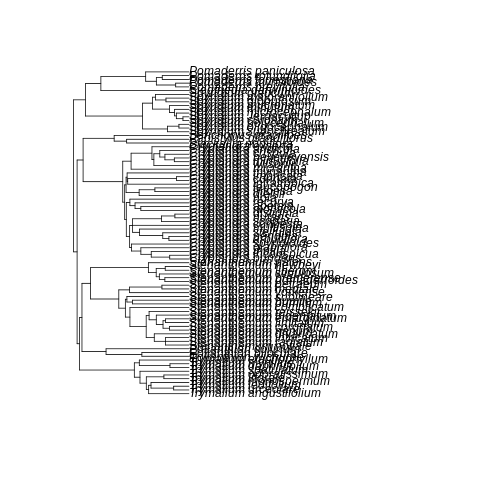

In [ ]:
%%R
plot(tree1)


In [ ]:
%%R
Ntip(tree1)


[1] 87


In [ ]:
%%R
colnames(dd1)

 [1] "species"       "WA"            "Age"           "Ploidy"       
 [5] "log.length"    "log.area"      "log.turn"      "log.netd"     
 [9] "log.spec"      "species.1"     "Rare..Yes.No." "EPBC"         
[13] "WA.Ranking"    "January"       "February"      "March"        
[17] "April"         "May"           "June"          "July"         
[21] "August"        "September"     "October"       "November"     
[25] "December"      "log.b19"       "log.b18"       "log.b17"      
[29] "log.b16"       "log.b15"       "log.b14"       "log.b13"      
[33] "log.b12"       "log.b11"       "log.b10"       "log.b9"       
[37] "log.b8"        "log.b7"        "log.b6"        "log.b5"       
[41] "log.b4"        "log.b3"        "log.b2"        "log.b1"       


In [ ]:
%%R
dd1 <- dd1[match(tree1$tip.label, dd1$species), ]

In [ ]:
%%R
dd1$'Sum of months' <- rowSums(dd1[, c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")])


In [ ]:
%%R
dd1[['Sum of months']]

 [1]  6  3  6  1  3  5  5  5  4  4  4  8  3 12  1  9  4  2  2  2  4  4  3  6  3
[26]  4  3  0  5  7  7  2 12  0  4  7  7  1  2  4  4  7  2  3  7  7  3  6  5  5
[51]  3  6  3  3  4  4  4  4  3  6  5  4  6  2  5  3  1  1  2  2  3  5  8 10  8
[76] 10  6  7  6  8  3  7  9  7  5  5  5


In [ ]:
%%R
colnames(dd1)

 [1] "species"       "WA"            "Age"           "Ploidy"       
 [5] "log.length"    "log.area"      "log.turn"      "log.netd"     
 [9] "log.spec"      "species.1"     "Rare..Yes.No." "EPBC"         
[13] "WA.Ranking"    "January"       "February"      "March"        
[17] "April"         "May"           "June"          "July"         
[21] "August"        "September"     "October"       "November"     
[25] "December"      "log.b19"       "log.b18"       "log.b17"      
[29] "log.b16"       "log.b15"       "log.b14"       "log.b13"      
[33] "log.b12"       "log.b11"       "log.b10"       "log.b9"       
[37] "log.b8"        "log.b7"        "log.b6"        "log.b5"       
[41] "log.b4"        "log.b3"        "log.b2"        "log.b1"       


In [ ]:
%%R
y <- dd1[['Sum of months']]
x <- dd1$WA.Ranking

result <- phylANOVA(tree, x, y, nsim=1000, posthoc=TRUE, p.adj="holm")
result



ANOVA table: Phylogenetic ANOVA

Response: y
            Sum Sq   Mean Sq F value Pr(>F)
x         97.02001 24.255003 5.36634  0.001
Residual 289.26984  4.519841               

P-value based on simulation.
---------

Pairwise posthoc test using method = "holm"

Pairwise t-values:
          0         1        2         3         4
0  0.000000  2.802770 3.462246  2.423810 -0.525125
1 -2.802770  0.000000 0.502845 -0.503718 -2.109804
2 -3.462246 -0.502845 0.000000 -1.037065 -2.499306
3 -2.423810  0.503718 1.037065  0.000000 -1.803080
4  0.525125  2.109804 2.499306  1.803080  0.000000

Pairwise corrected P-values:
      0     1     2     3     4
0 1.000 0.072 0.010 0.126 1.000
1 0.072 1.000 1.000 1.000 0.126
2 0.010 1.000 1.000 0.904 0.072
3 0.126 1.000 0.904 1.000 0.225
4 1.000 0.126 0.072 0.225 1.000
---------



In [ ]:
%%R
head(dd1,5)

                   species WA   Age Ploidy log.length log.area   log.turn
1     Blackallia_nudiflora  1 13.04      2   2.637490 4.615813 -1.0854667
2       Cryptandra_apetala  1 10.08      2   2.904174 5.018804 -1.0852384
3   Cryptandra_arbutiflora  1  4.20      3   2.948902 5.157170 -1.0530070
4     Cryptandra_aridicola  1  4.25      2   2.795185 5.218620 -1.0476917
5 Cryptandra_beverleyensis  1  3.07      3   2.392697 4.179236 -0.9913877
    log.netd   log.spec                species.1 Rare..Yes.No. EPBC WA.Ranking
1 -1.0894710 -1.0874642     Blackallia nudiflora             1    0          3
2 -1.0892424 -1.0872358       Cryptandra apetala             0    0          0
3 -1.0570650 -1.0550313   Cryptandra arbutiflora             0    0          0
4 -1.0517772 -1.0497297     Cryptandra aridicola             0    0          0
5 -0.9956413 -0.9935093 Cryptandra beverleyensis             1    0          3
  January February March April May June July August September October November
1  

In [ ]:
%%R
print(head(dd1,3))

                 species WA   Age Ploidy log.length log.area  log.turn
1   Blackallia_nudiflora  1 13.04      2   2.637490 4.615813 -1.085467
2     Cryptandra_apetala  1 10.08      2   2.904174 5.018804 -1.085238
3 Cryptandra_arbutiflora  1  4.20      3   2.948902 5.157170 -1.053007
   log.netd  log.spec              species.1 Rare..Yes.No. EPBC WA.Ranking
1 -1.089471 -1.087464   Blackallia nudiflora             1    0          3
2 -1.089242 -1.087236     Cryptandra apetala             0    0          0
3 -1.057065 -1.055031 Cryptandra arbutiflora             0    0          0
  January February March April May June July August September October November
1       0        0     0     0   0    0    0      1         0       0        0
2       0        0     0     0   0    0    0      1         1       1        0
3       0        0     0     0   1    1    1      1         1       1        1
  December  log.b19  log.b18 log.b17  log.b16  log.b15  log.b14  log.b13
1        0 2.354108 1.57403